# Завдання 1: Визначення шаблонів зміни тривалості оренди велосипедів залежно від часу доби, дня тижня, сезону

In [1]:
import pandas as pd
import datetime
import time
import helpful_functions
import matplotlib.pyplot as plt
import warnings

from matplotlib.ticker import MultipleLocator

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
df = pd.read_csv('./data/oslo_clear_rides_data.csv')
df.head()

,started_at_dt,ended_at_dt,duration,start_station_id,end_station_id
0,2019-04-03 00:18:47+02:00,2019-04-03 00:24:25+02:00,337,401,381
1,2019-04-03 00:25:54+02:00,2019-04-03 00:27:36+02:00,101,556,556
2,2019-04-03 00:26:39+02:00,2019-04-03 00:31:59+02:00,320,561,471
3,2019-04-03 05:09:58+02:00,2019-04-03 05:12:00+02:00,121,393,393
4,2019-04-03 05:10:02+02:00,2019-04-03 05:14:44+02:00,282,597,557


In [3]:
datetime_pattern = "%Y-%m-%d %H:%M:%S%z"

df['started_at_dt'] = df['started_at_dt'].apply(lambda x: datetime.datetime.strptime(x, datetime_pattern))
df['ended_at_dt'] = df['ended_at_dt'].apply(lambda x: datetime.datetime.strptime(x, datetime_pattern))

# df.dtypes

### Питання 1:
Чи є в нас пропуски в даних?

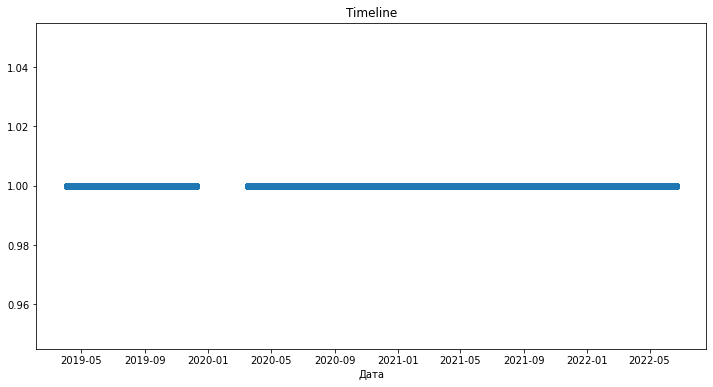

In [4]:
df_copy = pd.DataFrame()
df_copy = df[['started_at_dt']]
df_copy['1'] = 1

fig, ax = plt.subplots()
ax.scatter(x=df_copy['started_at_dt'], y=df_copy['1'])
ax.set_title('Timeline')
ax.set_xlabel('Дата')
plt.show()

Бачимо, що пропуск є. На початку 2020 року. Це схоже на зупинку роботи сервісу на зимовий час. В 2021 та 2022 таких зупинок не було.

In [6]:
df_copy['year'] = df_copy['started_at_dt'].apply(lambda x: x.year)
print("Зимова перерва між: ")
print(df_copy[df_copy['year'] == 2019]['started_at_dt'].max())
print(df_copy[df_copy['year'] == 2020]['started_at_dt'].min())

Зимова перерва між: 
2019-12-08 23:59:18+01:00
2020-03-18 00:11:09+01:00


### Питання 2:
Як змінюється тривалість оренди велосипедів в залежності від часу доби?

In [8]:
print("Duration stats: (in seconds)")
print('average: ', df['duration'].mean())
print('median: ', df['duration'].median())
print('min: ', df['duration'].min())
print('max: ', df['duration'].max())

Duration stats: (in seconds)
average:  756.3462069708003
median:  540.0
min:  61
max:  86240


In [9]:
df['start_hour'] = df['started_at_dt'].apply(lambda x: x.hour)

In [11]:
df_hour_duration_avg = df[['duration', 'start_hour']].groupby(['start_hour']).mean()
df_hour_duration_median = df[['duration', 'start_hour']].groupby(['start_hour']).median()
df_hour_count = df[['duration', 'start_hour']].groupby(['start_hour']).count()

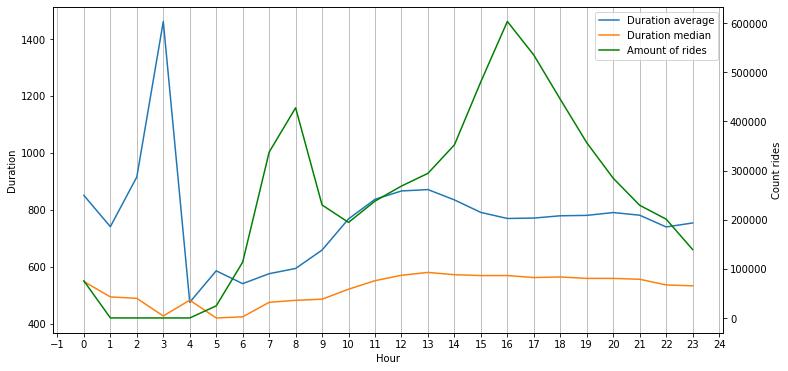

In [20]:
fig, ax = plt.subplots()

ax_l = ax.twinx()
lns1 = ax.plot(df_hour_duration_avg, label='Duration average')
lns2 = ax.plot(df_hour_duration_median, label='Duration median')
ax.set_ylabel('Duration')
ax.set_xlabel('Hour')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
lns3 = ax_l.plot(df_hour_count, color='g', label='Amount of rides')
ax_l.set_ylabel('Count rides')
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()

### Питання 3:
Як змінюється тривалість оренди велосипедів в залежності від дня тижня?

In [23]:
df_3 = df
df_3['day_of_week'] = df_3['started_at_dt'].apply(lambda x: 7 if (int(x.strftime('%w'))) == 0 else int(x.strftime('%w')))
df_3.head()

,started_at_dt,ended_at_dt,duration,start_station_id,end_station_id,start_hour,day_of_week
0,2019-04-03 00:18:47+02:00,2019-04-03 00:24:25+02:00,337,401,381,0,3
1,2019-04-03 00:25:54+02:00,2019-04-03 00:27:36+02:00,101,556,556,0,3
2,2019-04-03 00:26:39+02:00,2019-04-03 00:31:59+02:00,320,561,471,0,3
3,2019-04-03 05:09:58+02:00,2019-04-03 05:12:00+02:00,121,393,393,5,3
4,2019-04-03 05:10:02+02:00,2019-04-03 05:14:44+02:00,282,597,557,5,3


In [24]:
df_day_duration_avg = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).mean()
df_day_duration_median = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).median()
df_day_count = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).count()

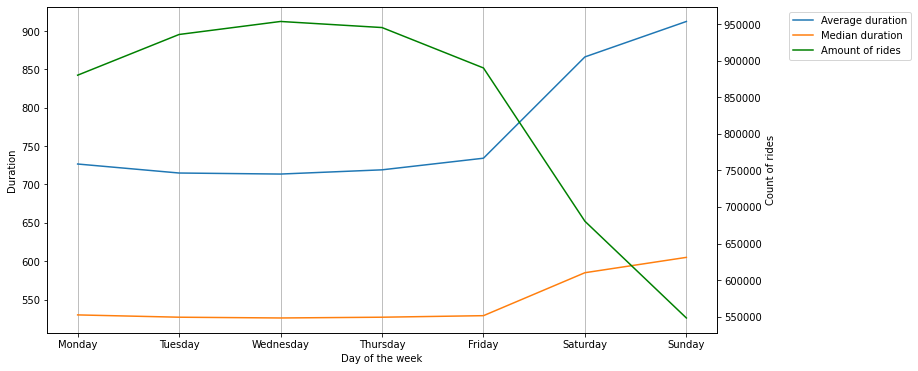

In [29]:
fig, ax = plt.subplots()

ax_l = ax.twinx()
lns1 = ax.plot(df_day_duration_avg, label='Average duration')
lns2 = ax.plot(df_day_duration_median, label='Median duration')
ax.set_ylabel('Duration')
ax.set_xlabel('Day of the week')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax_l.plot(df_day_count, color='g', label='Amount of rides')
ax_l.set_ylabel('Count of rides')
ax.set_xticks(range(1,8), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.1, 1.0))
plt.show()

Тут вже цікаво: Виходить, що на вихідниих кількість поїздок зменшується, але їхня тривалість збільшується.

### Питання 4:
Як змінюється тривалість оренди велосипедів в залежності від місяця?

In [33]:
df_4 = df
df_4['month'] = df_4['started_at_dt'].apply(lambda x: x.strftime('%m'))
df_4.head()

,started_at_dt,ended_at_dt,duration,start_station_id,end_station_id,start_hour,day_of_week,month
0,2019-04-03 00:18:47+02:00,2019-04-03 00:24:25+02:00,337,401,381,0,3,04
1,2019-04-03 00:25:54+02:00,2019-04-03 00:27:36+02:00,101,556,556,0,3,04
2,2019-04-03 00:26:39+02:00,2019-04-03 00:31:59+02:00,320,561,471,0,3,04
3,2019-04-03 05:09:58+02:00,2019-04-03 05:12:00+02:00,121,393,393,5,3,04
4,2019-04-03 05:10:02+02:00,2019-04-03 05:14:44+02:00,282,597,557,5,3,04


In [34]:
df_month_duration_avg = df_4[['duration', 'month']].groupby(['month']).mean()
df_month_duration_median = df_4[['duration', 'month']].groupby(['month']).median()
df_month_count = df_4[['duration', 'month']].groupby(['month']).count()

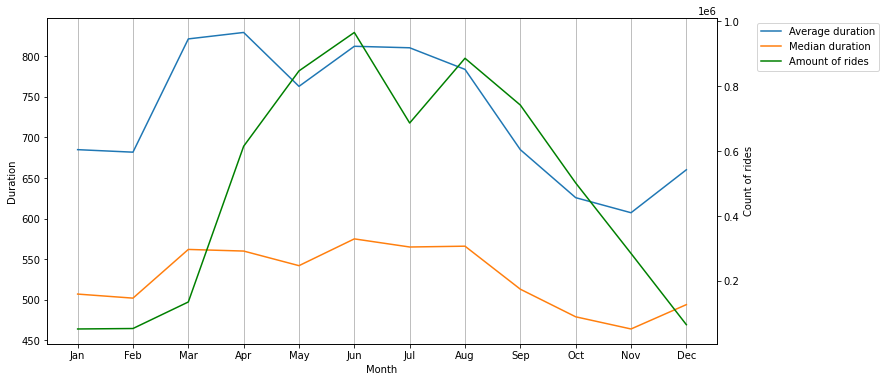

In [41]:
fig, ax = plt.subplots()

ax_l = ax.twinx()
lns1 = ax.plot(df_month_duration_avg, label='Average duration')
lns2 = ax.plot(df_month_duration_median, label='Median duration')
ax.set_ylabel('Duration')
ax.set_xlabel('Month')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax_l.plot(df_month_count, color='g', label='Amount of rides')
ax_l.set_ylabel('Count of rides')
ax.set_xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, bbox_to_anchor=(1.25, 1.0))
plt.show()